we will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes 

# import libraries

In [1]:
###step1 : Import the libraries 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #sklearn package's randomized data splitting function.
from sklearn.linear_model import LinearRegression 
import pandas as pd

In [3]:
#step2: load the file

load and review data

In [4]:
car_df= pd.read_csv("auto-mpg.csv")

In [5]:
car_df.shape

(398, 9)

In [6]:
car_df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [7]:
car_df.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [8]:
car_df.tail(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [9]:
car_df.sample()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion


In [10]:
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
67,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
282,22.3,4,140.0,88,2890,17.3,79,1,ford fairmont 4
86,14.0,8,304.0,150,3672,11.5,73,1,amc matador
214,13.0,8,302.0,130,3870,15.0,76,1,ford f108
263,17.7,6,231.0,165,3445,13.4,78,1,buick regal sport coupe (turbo)
135,18.0,6,225.0,105,3613,16.5,74,1,plymouth satellite sebring
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
310,38.1,4,89.0,60,1968,18.8,80,3,toyota corolla tercel


In [11]:
#dropping/ignoring car_name
car_df=car_df.drop('car name',axis=1)
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
103,11.0,8,400.0,150,4997,14.0,73,1
73,13.0,8,307.0,130,4098,14.0,72,1
112,19.0,4,122.0,85,2310,18.5,73,1
86,14.0,8,304.0,150,3672,11.5,73,1
114,26.0,4,98.0,90,2265,15.5,73,2
12,15.0,8,400.0,150,3761,9.5,70,1
301,34.2,4,105.0,70,2200,13.2,79,1
186,27.0,4,101.0,83,2202,15.3,76,2
262,19.2,8,305.0,145,3425,13.2,78,1
318,29.8,4,134.0,90,2711,15.5,80,3


In [12]:
#Also replacing the categorical var with actual values
car_df['origin']= car_df['origin'].replace({1: 'america',2: 'europe' , 3: 'asia'})
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
230,15.5,8,350.0,170,4165,11.4,77,america
19,26.0,4,97.0,46,1835,20.5,70,europe
247,39.4,4,85.0,70,2070,18.6,78,asia
197,29.0,4,90.0,70,1937,14.2,76,europe
208,13.0,8,318.0,150,3940,13.2,76,america
147,24.0,4,90.0,75,2108,15.5,74,europe
17,21.0,6,200.0,85,2587,16.0,70,america
344,39.0,4,86.0,64,1875,16.4,81,america
117,29.0,4,68.0,49,1867,19.5,73,europe
266,30.0,4,98.0,68,2155,16.5,78,america


In [13]:
#one hot encoding 
car_df = pd.get_dummies(car_df,columns=['origin'])
#one hot encoding
car_df.sample(10)


,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
95,12.0,8,455.0,225,4951,11.0,73,1,0,0
220,33.5,4,85.0,70,1945,16.8,77,0,1,0
277,16.2,6,163.0,133,3410,15.8,78,0,0,1
130,26.0,4,122.0,80,2451,16.5,74,1,0,0
331,33.8,4,97.0,67,2145,18.0,80,0,1,0
312,37.2,4,86.0,65,2019,16.4,80,0,1,0
324,40.8,4,85.0,65,2110,19.2,80,0,1,0
235,26.0,4,97.0,75,2265,18.2,77,0,1,0
195,29.0,4,85.0,52,2035,22.2,76,1,0,0
84,27.0,4,97.0,88,2100,16.5,72,0,1,0


In [14]:
#dealing with missing values

In [15]:
#A quick summary of the data columns
car_df.describe(include="all")

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [17]:
#hp is missing cause it does not seem to be recognized as a numerical column!
car_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [18]:
# isdigit()? on 'horsepower'
hpISDigit = pd.DataFrame(car_df.hp.str.isdigit())
#if the string is made of digits store True else False

In [19]:
#print is Digit = False!
car_df[hpISDigit['hp']==False]
#from temp take only those rows where hp has false

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [20]:
 #Missing values have a "?"
 #Replace missing values with NAN
car_df = car_df.replace('?',np.nan)
car_df[hpISDigit['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values.Drop the rows,replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. we could drop those 6 rows-which might not be a good idea under all situations.

In [21]:
#instead of dropping the rows,lets replace the missing values with median value.
car_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [22]:
#replace the missing values with median value
#Note,we do not need to specify the column names below.
#every column's missing value is replaced with that column's median respectively.

In [23]:
medianFiller= lambda x: x.fillna(x.median())
car_df= car_df.apply(medianFiller, axis=0)

In [24]:
car_df['hp']=car_df['hp'].astype('float64')
#converting the hp column from object/string type to float

In [25]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


# Bivariate Plots
*** A bivariate analysis  among the different variables can be done using scatter matrix plot. seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

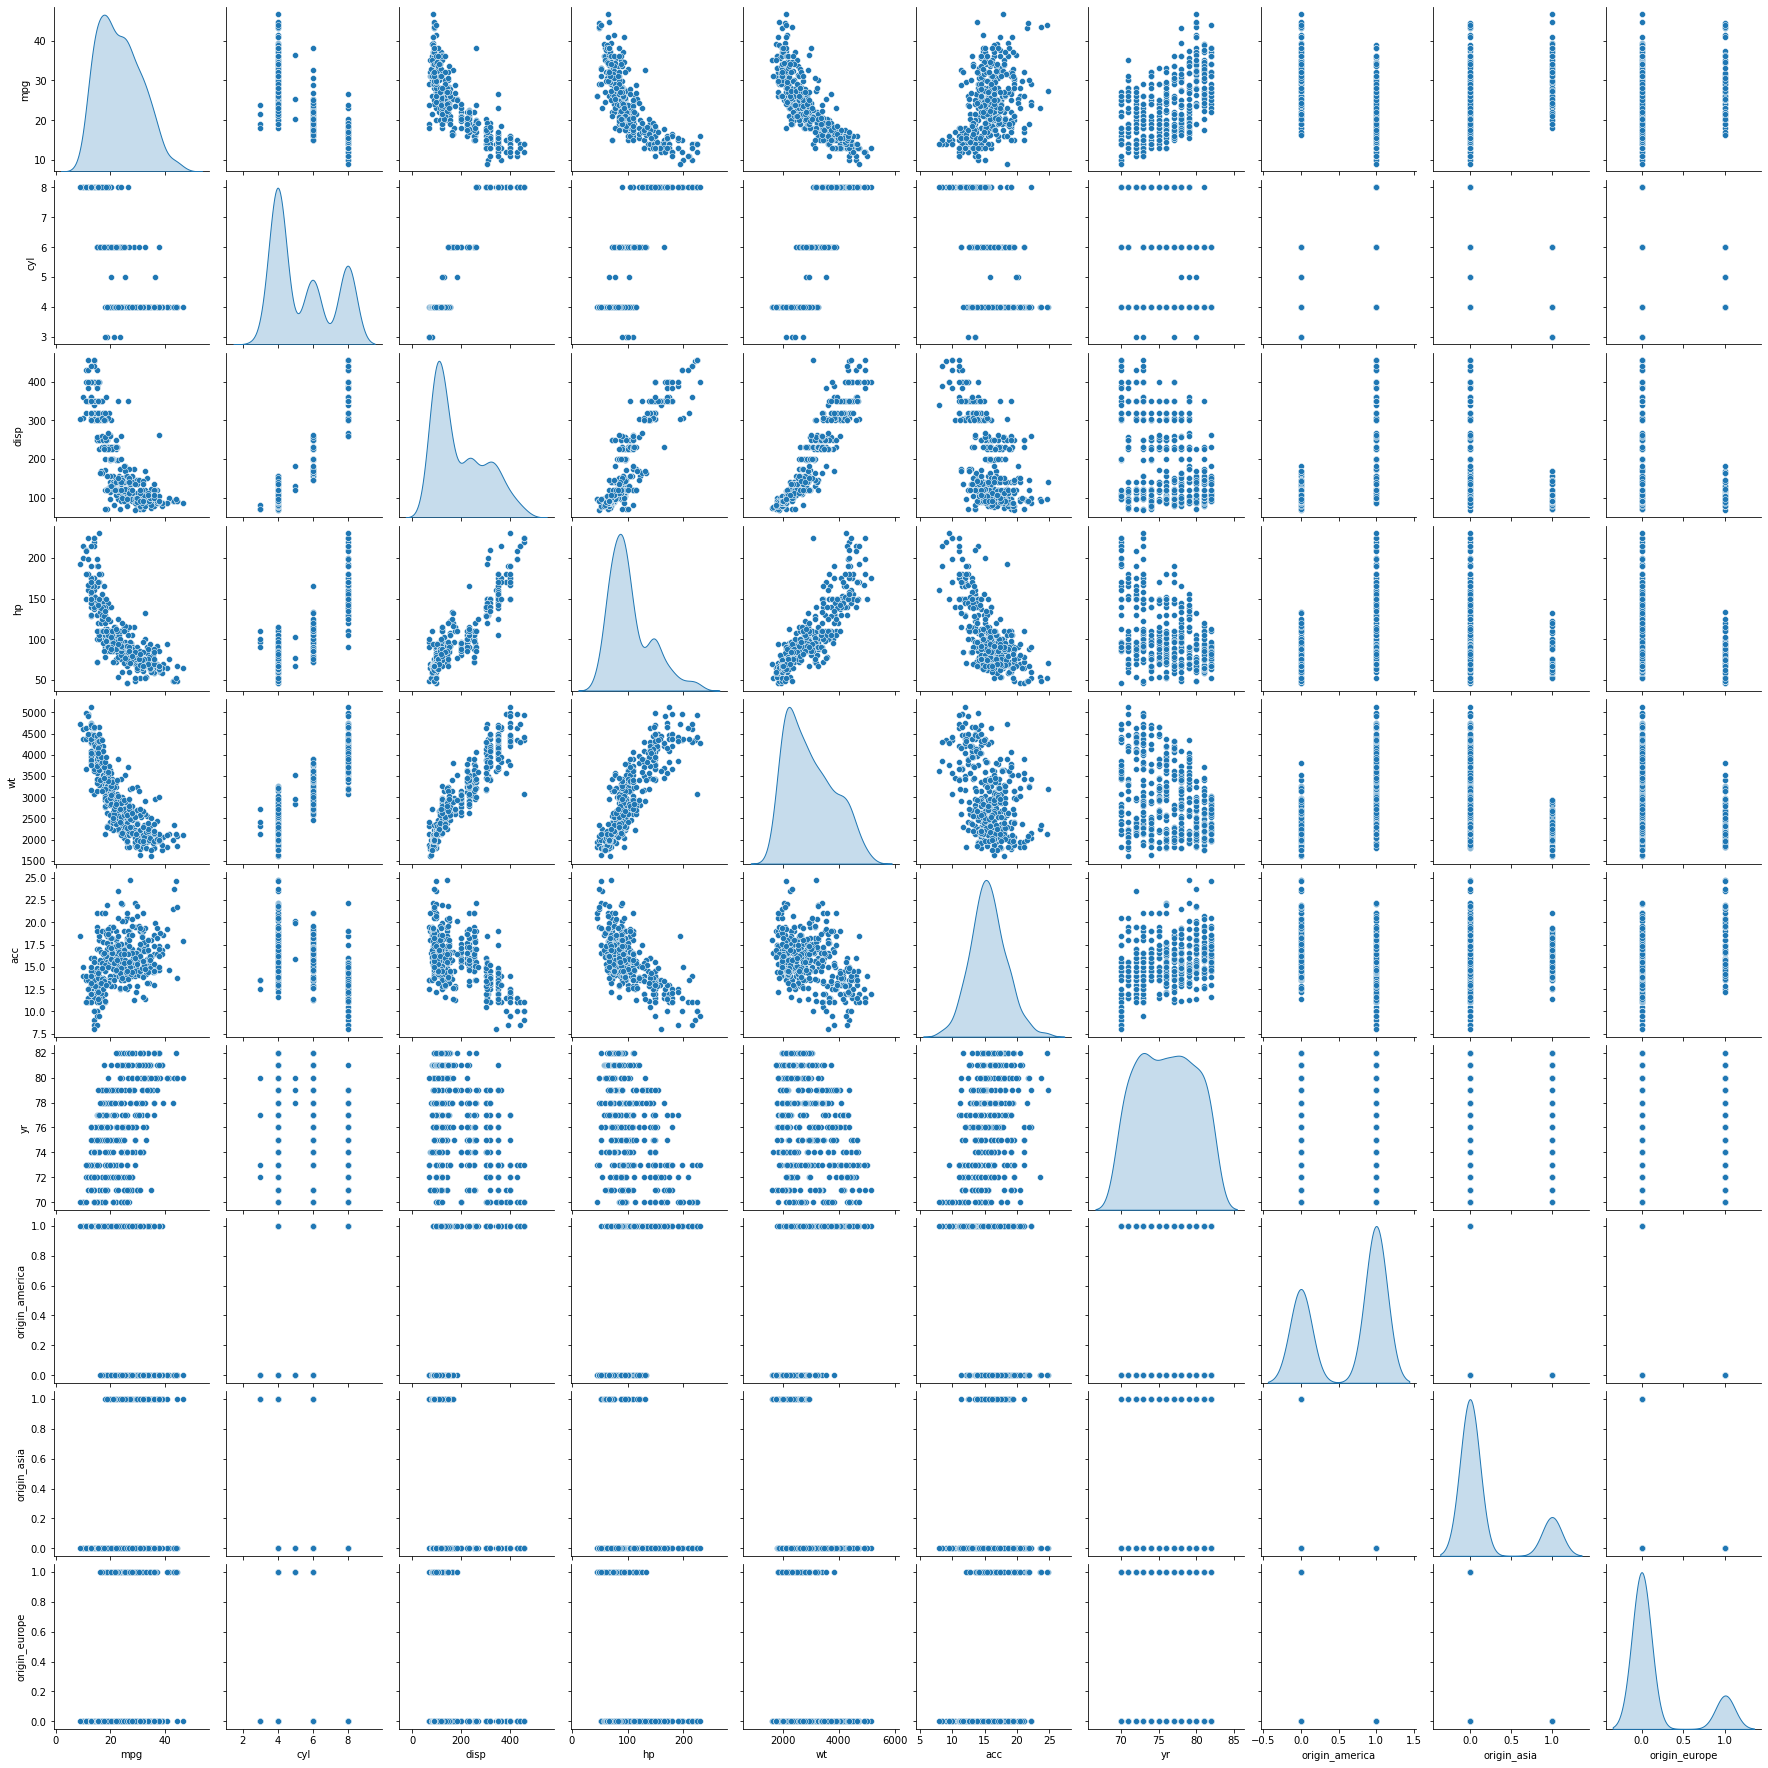

In [26]:
sns.pairplot(car_df , diag_kind='kde')

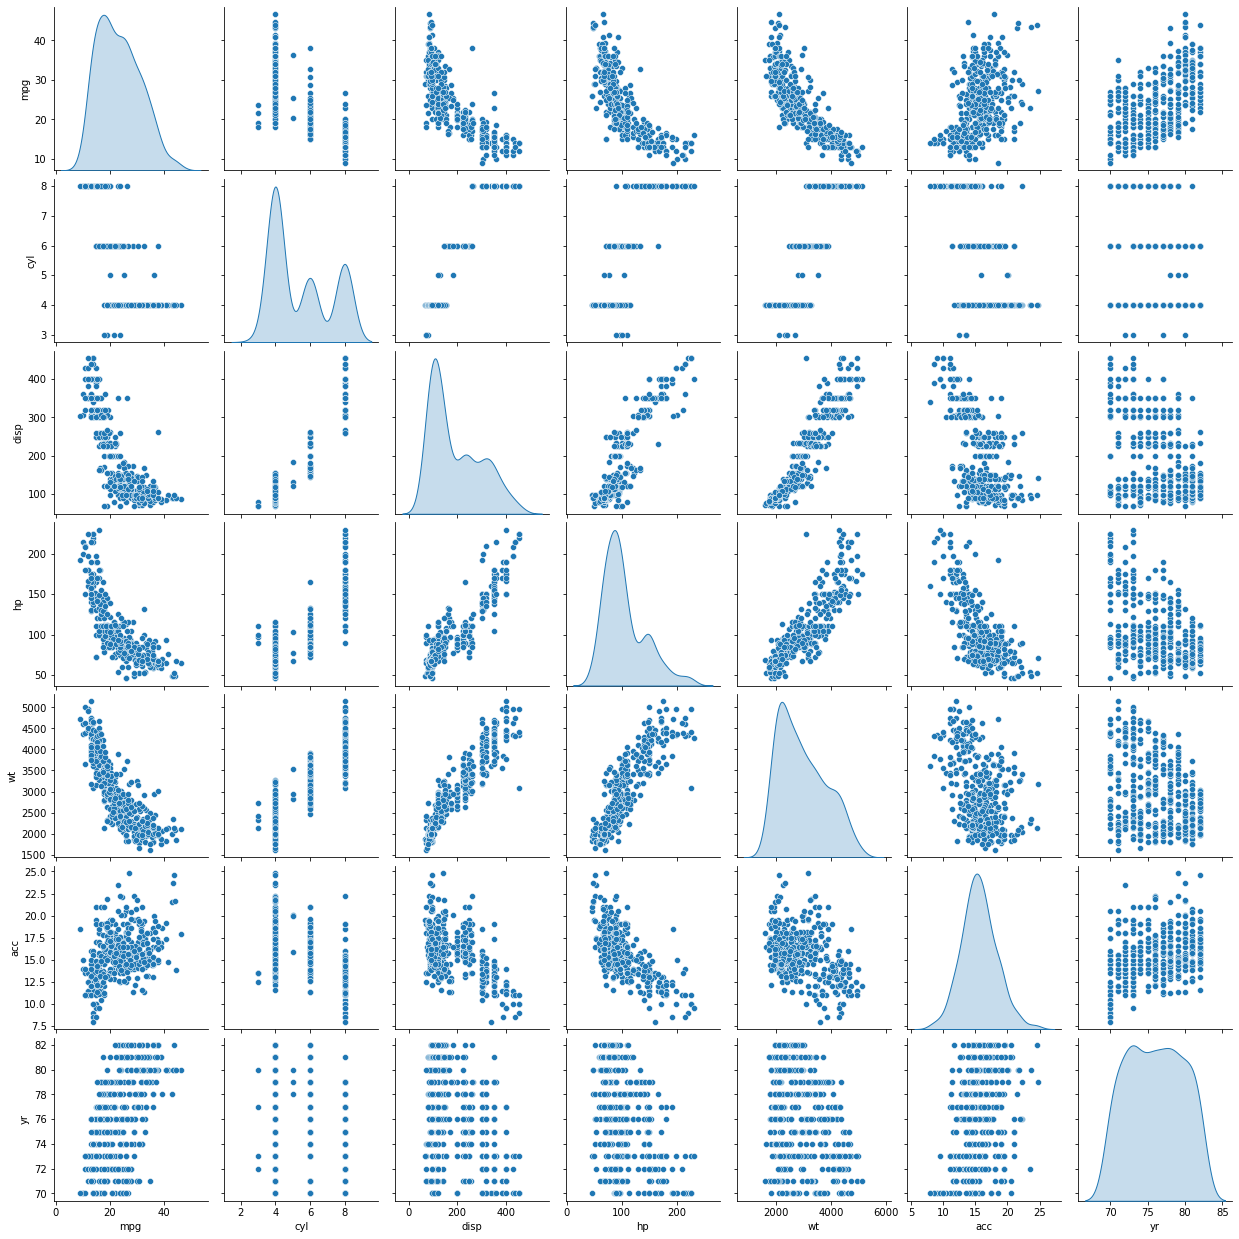

In [27]:
car_df_attr = car_df.iloc[: , 0:7]
sns.pairplot(car_df_attr, diag_kind='kde')
#to plot density curve instead of histogram on the diag


# Split Data

In [29]:
#lets build our linear model 
#independent variables
x=car_df.drop(['mpg'],axis=1)
#the dependent variable
y=car_df[['mpg']]

In [30]:
#split x and y into training and test set in 70:30 ratio
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30 , random_state=1)

# Fit linear model

In [31]:
reg_model1= LinearRegression()
reg_model1.fit(x_train, y_train)

LinearRegression()

In [32]:
reg_model1.score(x_train, y_train)

0.8141025501610559

In [33]:
#out of sample score(R^2)
reg_model1.score(x_test, y_test)

0.8433135132808829

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2,interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf=linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

#print(y_pred)

#In sample(training) R^2 will always improve with the number of variables!

print(poly_clf.score(x_train2, y_train))


0.8995492105437926


In [39]:
#out off sample(testing) R^2 is our measure of success and does improve
print(poly_clf.score(x_test2, y_test))


0.861349075272287
